In [1]:
%matplotlib inline

import networkx as nx

from decorator import decorator

from networkx.utils import create_random_state, create_py_random_state

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

# To get rid of warning messages
warnings.filterwarnings('ignore') 

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{ : , .2f}'.format        

# Update default background style of plots
sns.set_style(style = 'darkgrid')


In [2]:
P1 = pd.read_csv("CAVIAR_Phases - Notebook/phase1.csv")

P2 = pd.read_csv("CAVIAR_Phases - Notebook/phase2.csv")

P3 = pd.read_csv("CAVIAR_Phases - Notebook/phase3.csv")

P4 = pd.read_csv("CAVIAR_Phases - Notebook/phase4.csv")

P5 = pd.read_csv("CAVIAR_Phases - Notebook/phase5.csv")

P6 = pd.read_csv("CAVIAR_Phases - Notebook/phase6.csv")

P7 = pd.read_csv("CAVIAR_Phases - Notebook/phase7.csv")

P8 = pd.read_csv("CAVIAR_Phases - Notebook/phase8.csv")

P9 = pd.read_csv("CAVIAR_Phases - Notebook/phase9.csv")

P10 = pd.read_csv("CAVIAR_Phases - Notebook/phase10.csv")

P11 = pd.read_csv("CAVIAR_Phases - Notebook/phase11.csv")

In [3]:
P1.head()

,Unnamed: 0,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
0,1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3,83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [8]:
# Defining a list with the phases
phases = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]


In [15]:
# Now, let us set the first column as the index for all the DataFrames
for p in phases:
    p.set_index(p.columns[0], inplace = True)


In [16]:
P1

,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
Unnamed: 0,,,,,,,,,,,,,,,
1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
P1.index

Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0')

In [18]:
P1.columns

Index(['1', '4', '89', '83', '3', '5', '88', '85', '90', '2', '7', '54', '6',
       '64', '8'],
      dtype='object')

In [24]:
# Let's convert the column names to integer types so that all values in the adjacency matrix we're building are of 
# same dtype

col = []
for p in phases:
    for i in p.columns:
        col.append(int(i))
    p.columns = col
    col = []

In [26]:
P1.columns, P1.index

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64'),
 Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'))

Generating Graphs
Now, that we have created the adjacency matrices, let us now try to create graphs out of these adjacency matrices.

We will use the from_pandas_adjacency function and pass the adjacency matrix for each phase as a DataFrame.

In [31]:
graphs = []

for i, p in enumerate(phases):
    name = 'graph' + str(i + 1) 
    
    print(name)
    
    g = nx.from_pandas_adjacency(p)
    print(g)
    print('The nodes are: ')
    graphs.append(g)
    
    print(g.nodes(), '\n')

graph1
Graph with 15 nodes and 18 edges
The nodes are: 
[5, 83, 3, 90, 88, 85, 89, 4, 8, 64, 6, 54, 7, 2, 1] 

graph2
Graph with 24 nodes and 28 edges
The nodes are: 
[3, 85, 83, 90, 64, 6, 2, 7, 86, 88, 89, 12, 11, 9, 76, 98, 47, 97, 56, 10, 55, 8, 5, 1] 

graph3
Graph with 33 nodes and 56 edges
The nodes are: 
[5, 83, 88, 48, 89, 3, 7, 6, 52, 2, 90, 86, 85, 4, 12, 51, 13, 99, 50, 107, 49, 84, 32, 11, 35, 34, 9, 76, 56, 10, 55, 8, 1] 

graph4
Graph with 33 nodes and 48 edges
The nodes are: 
[5, 83, 88, 90, 85, 3, 76, 47, 6, 106, 8, 7, 86, 89, 4, 15, 52, 14, 12, 31, 109, 63, 51, 13, 107, 49, 84, 53, 11, 35, 9, 2, 1] 

graph5
Graph with 32 nodes and 39 edges
The nodes are: 
[5, 88, 83, 6, 86, 76, 89, 3, 32, 100, 34, 11, 8, 15, 55, 2, 85, 4, 19, 82, 25, 17, 18, 108, 12, 31, 13, 84, 9, 47, 7, 1] 

graph6
Graph with 26 nodes and 46 edges
The nodes are: 
[3, 8, 11, 13, 84, 12, 85, 82, 15, 83, 5, 19, 25, 31, 76, 2, 4, 20, 87, 77, 78, 18, 14, 9, 6, 1] 

graph7
Graph with 36 nodes and 49 edges

****************************************************************************************
Graph for phase: 1


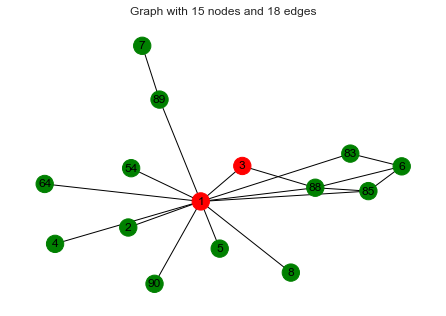

****************************************************************************************
Graph for phase: 2


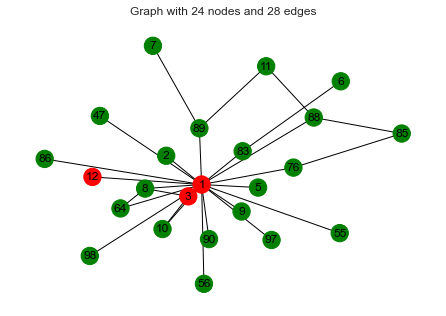

****************************************************************************************
Graph for phase: 3


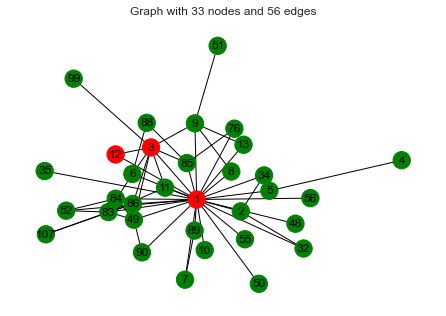

****************************************************************************************
Graph for phase: 4


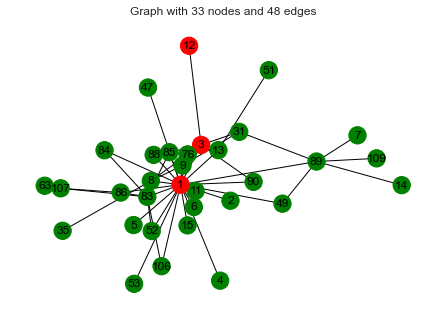

****************************************************************************************
Graph for phase: 5


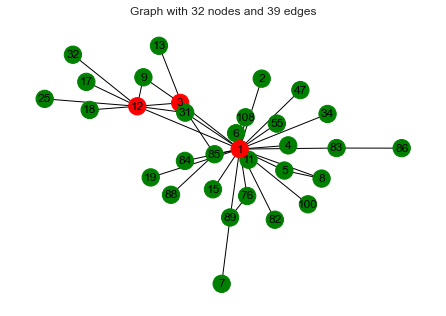

****************************************************************************************
Graph for phase: 6


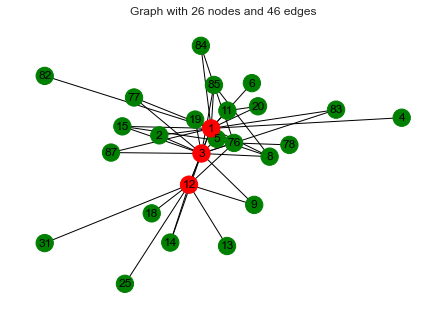

****************************************************************************************
Graph for phase: 7


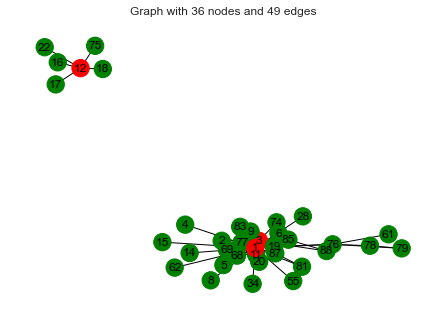

****************************************************************************************
Graph for phase: 8


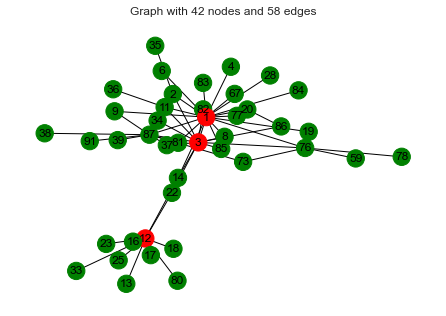

****************************************************************************************
Graph for phase: 9


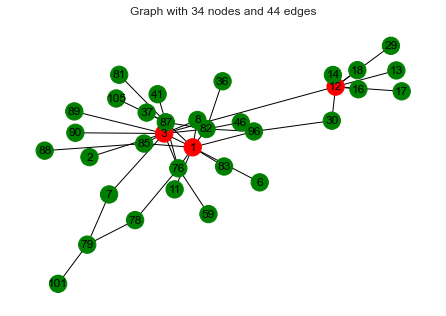

****************************************************************************************
Graph for phase: 10


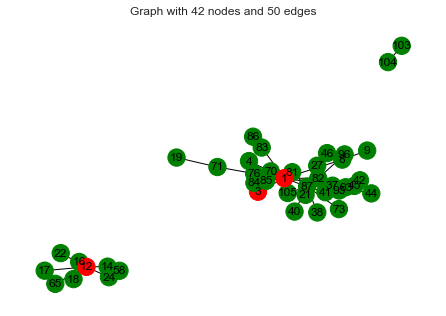

****************************************************************************************
Graph for phase: 11


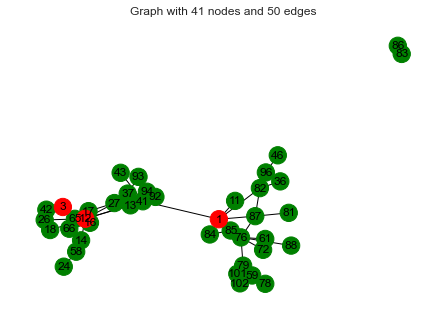

In [43]:
for i, g in enumerate(graphs):
    print("****************************************************************************************")
    
    print("Graph for phase:", i + 1)
    
    color = []

    for node in g:
        if (node == 1 or node == 12  or node == 3):
            color.append('red')
        else:
            color.append('green')

    nx.draw_spring(g, node_color = color, with_labels = True)
   # nx.draw(g, with_labels = True)
    
    plt.title(str(g))
    
    plt.show()

Centrality Measures
Let us now explore the various centrality measures for the above graphs.

a. Degree Centrality
Let us now calculate the degree centrality

In [33]:
# Let us store the degree centralities for each node of a graph in a dictionary
deg_cen = {}

for g in graphs:
    deg_cen[g] = nx.degree_centrality(g)

In [34]:
deg_cen

{<networkx.classes.graph.Graph at 0x7fd3b6365250>: {5: 0.07142857142857142,
  83: 0.14285714285714285,
  3: 0.14285714285714285,
  90: 0.07142857142857142,
  88: 0.2857142857142857,
  85: 0.21428571428571427,
  89: 0.14285714285714285,
  4: 0.07142857142857142,
  8: 0.07142857142857142,
  64: 0.07142857142857142,
  6: 0.21428571428571427,
  54: 0.07142857142857142,
  7: 0.07142857142857142,
  2: 0.07142857142857142,
  1: 0.8571428571428571},
 <networkx.classes.graph.Graph at 0x7fd3b6365d90>: {3: 0.13043478260869565,
  85: 0.08695652173913043,
  83: 0.08695652173913043,
  90: 0.043478260869565216,
  64: 0.08695652173913043,
  6: 0.043478260869565216,
  2: 0.043478260869565216,
  7: 0.043478260869565216,
  86: 0.043478260869565216,
  88: 0.13043478260869565,
  89: 0.13043478260869565,
  12: 0.043478260869565216,
  11: 0.08695652173913043,
  9: 0.043478260869565216,
  76: 0.08695652173913043,
  98: 0.043478260869565216,
  47: 0.043478260869565216,
  97: 0.043478260869565216,
  56: 0.04347

b. Eigenvector, Betweenness, and Closeness Centrality measures

In [35]:
# Similarily, we can generate other centrality measures
# Let us try all the measures that we learnt

# Eigenvector Centrality
eig_cen = {}

for g in graphs:
    eig_cen[g] = nx.eigenvector_centrality(g)

# Betweenness Centrality
betw_cen = {}

for g in graphs:
    betw_cen[g] = nx.betweenness_centrality(g)

# Closeness Centrality
clo_cen = {}

for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

In [36]:
# Let us now sort the degree centrality measure and identify the important nodes

for ix, g in enumerate(graphs):
    temp_dict = {}
    for w in sorted(deg_cen[g], key = deg_cen[g].get, reverse = True):
        temp_dict[w] = deg_cen[g][w]
    print("Sorted importance of nodes in terms of deg_cen for Phase {} is {}".format(ix + 1, list(temp_dict.keys())[:5]))
    print()

Sorted importance of nodes in terms of deg_cen for Phase 1 is [1, 88, 85, 6, 83]

Sorted importance of nodes in terms of deg_cen for Phase 2 is [1, 3, 88, 89, 8]

Sorted importance of nodes in terms of deg_cen for Phase 3 is [1, 3, 83, 49, 9]

Sorted importance of nodes in terms of deg_cen for Phase 4 is [1, 83, 3, 89, 85]

Sorted importance of nodes in terms of deg_cen for Phase 5 is [1, 12, 3, 31, 89]

Sorted importance of nodes in terms of deg_cen for Phase 6 is [1, 3, 12, 76, 85]

Sorted importance of nodes in terms of deg_cen for Phase 7 is [1, 3, 12, 76, 19]

Sorted importance of nodes in terms of deg_cen for Phase 8 is [1, 3, 12, 87, 76]

Sorted importance of nodes in terms of deg_cen for Phase 9 is [3, 1, 12, 87, 82]

Sorted importance of nodes in terms of deg_cen for Phase 10 is [1, 87, 37, 12, 82]

Sorted importance of nodes in terms of deg_cen for Phase 11 is [12, 41, 76, 1, 79]



Understanding the variation of node importance across phases

From the above analysis, we figure out that some nodes appear to be more important than others, and we will focus our attention on analyzing those nodes.

Let us take out Node1, Node3, and Node12 and visualize their importance across phases. We will look at the betweenness and degree centrality only. You are encouraged to try out the same for other measures.

In [37]:
# Let us first start with node 1

# Node 1
node1_deg = []

phases = []

for ix, g in enumerate(graphs):
    node1_deg.append(deg_cen[g][1]*100)
    phases.append(ix + 1)

node1_bet = []

for ix, g in enumerate(graphs):
    node1_bet.append(betw_cen[g][1]*100)

# Now, let us calculate the same for node 3 and 12 as well

# Node 3
node3_deg = []

for ix, g in enumerate(graphs):
    node3_deg.append(deg_cen[g][3]*100)

node3_bet = []

for ix, g in enumerate(graphs):
    node3_bet.append(betw_cen[g][3]*100)

# Node 12
node12_deg = []

for ix, g in enumerate(graphs):
    if (12 in deg_cen[g].keys()):
        node12_deg.append(deg_cen[g][12]*100)
    else:
        node12_deg.append(None)

node12_bet = []

for ix, g in enumerate(graphs):
    if (12 in betw_cen[g].keys()):
        node12_bet.append(betw_cen[g][12]*100)
    else:
        node12_bet.append(None)

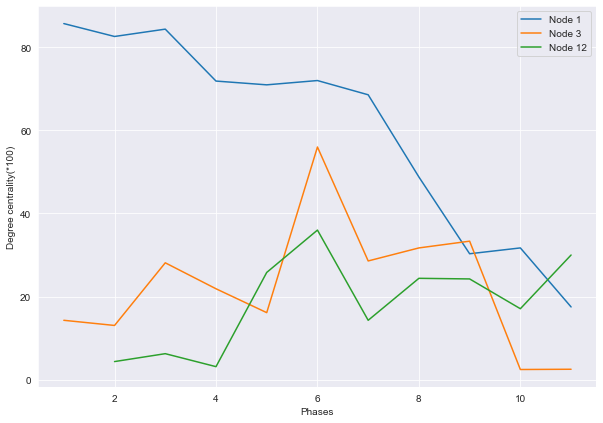

In [38]:
# Now, let us plot the importance of nodes across phases

# Plotting Degree centrality for nodes 1, 3, and 12
plt.figure(figsize = (10, 7))

plt.plot(phases, node1_deg, label = 'Node 1')

plt.plot(phases, node3_deg, label = 'Node 3')

plt.plot(phases, node12_deg, label = 'Node 12')

plt.ylabel('Degree centrality(*100)')

plt.xlabel('Phases')

plt.legend()

plt.show()

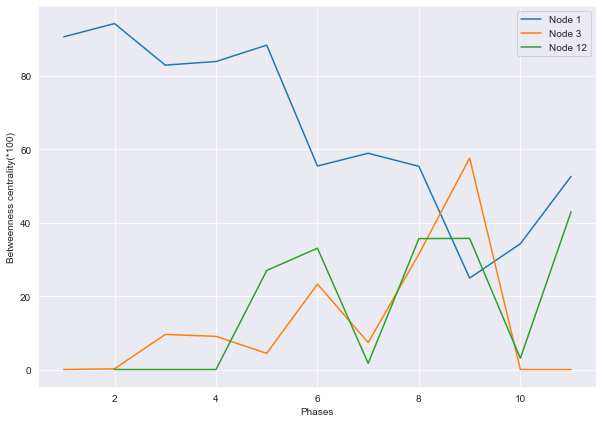

In [39]:
# Plotting the Betweenness Centrality for nodes 1, 3, and 12

plt.figure(figsize = (10, 7))

plt.plot(phases, node1_bet,  label = 'Node 1')

plt.plot(phases, node3_bet, label = 'Node 3')

plt.plot(phases, node12_bet, label = 'Node 12')

plt.ylabel('Betweenness centrality(*100)')

plt.xlabel('Phases')

plt.legend()

plt.show()

Conclusion:

We analyzed the network and employed techniques to read adjacency matrices into graphs.

Next, we visualized the graphs, created centrality measures, and identified the important nodes:  N1 (Daniel Serero), N3 (Pierre Perlini), N12 (Ernesto Morales).

We studied and plotted the variation in the centrality of the important nodes across phases to understand the effect of disruption in the network.

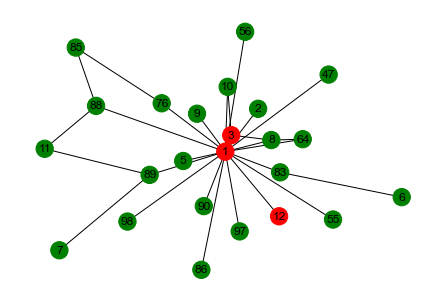

In [40]:
graph2 = nx.from_pandas_adjacency(P2)

color = []

for node in graph2:
    if (node == 1 or node == 12  or node == 3):
        color.append('red')
    else:
        color.append('green')

nx.draw_spring(graph2, node_color = color, with_labels = True)